## SPARROW VBSR

This notes aim to go over the use of SPARROW (a R script based on vbsr package) and variational Bayesian Spike Regression (vbsr).


### SPARROW

SPARROW ([Logstan et al. 2015](https://iths.pure.elsevier.com/en/publications/sparse-expression-bases-in-cancer-reveal-tumor-drivers)) and a example data set and script [here](http://sparrow-leelab.cs.washington.edu/more)

### Example for NK AML

In [1]:
system("curl -O http://leelab-data.cs.washington.edu/milesNKAML.tar.gz")
system("tar -xzvf milesNKAML.tar.gz")
system("curl -O http://leelab-data.cs.washington.edu/combMetzelerWoutersTomassonNKAML.tar.gz")
system("tar -xzvf combMetzelerWoutersTomassonNKAML.tar.gz")

In [2]:
miles <- read.csv('milesNKAML.csv',header=T,sep=',',row.names=NULL);
miles2 <- data.matrix(miles[,-1])
rownames(miles2) <- miles[,1];

In [3]:
metzelerWoutersTomasson <- read.csv('combMetzlerWoutersTomassonNKAML.csv',header=T,sep=',',row.names=NULL)
metzelerWoutersTomasson2 <- data.matrix(metzelerWoutersTomasson[,-1])
rownames(metzelerWoutersTomasson2) <- metzelerWoutersTomasson[,1]

In [4]:
head(miles2)
head(metzelerWoutersTomasson2)

,GSM330530,GSM330531,GSM330532,GSM330533,GSM330534,GSM330535,GSM330536,GSM330537,GSM330538,GSM330539,⋯,GSM330867,GSM330868,GSM330869,GSM330870,GSM330871,GSM330872,GSM330873,GSM330874,GSM330875,GSM330876
AKT3,-1.35225029,0.8356473,1.0283339,-0.52657097,-1.4770224,-0.9589506,0.5827748,-0.10961174,0.3019868,-0.3502993,⋯,0.09649054,-0.6147756,-0.2349980,-1.2848907,1.1022065,-0.5610597,1.1752308,0.85180554,-0.2894843,-0.4416032
MED6,0.01999946,-0.6786542,-1.3089422,0.59170334,-0.3785217,-1.3483432,0.3106974,-0.98694473,-0.3191602,-0.5693915,⋯,0.02910374,0.8274861,-0.9110237,-0.5349779,-0.3165061,-0.6889542,1.2828901,-0.86285466,0.4210472,-0.5154992
NR2E3,-0.95996846,0.1411159,-0.3310250,1.73027656,-0.9324522,-0.9540502,-1.5001198,0.44767088,-0.9267965,-0.2963249,⋯,0.53045253,-0.3009594,0.5553351,0.2522903,-1.0403793,-0.7884769,-0.4865739,0.03186801,0.7279742,0.1567534
NAALAD2,-0.69461468,0.9492262,1.6678821,-0.02663198,1.2025298,-0.3695345,-0.3800678,-0.54365219,1.3093525,-1.3058606,⋯,0.80868091,-1.7845844,0.1899345,-1.6847290,-1.0216756,0.2310107,1.5397074,-0.46372210,-1.1721485,-0.6151595
CDKN2BAS,-0.04077292,0.1627673,1.2490860,0.72489848,0.4308434,1.0924605,1.1612033,-0.39238335,-0.8447086,0.6207477,⋯,-0.01271122,0.9110837,0.3492370,0.2283722,-1.9992150,0.2548565,-0.2018491,0.80686657,-1.7672699,0.8316513
---,0.13722978,0.1138495,-0.7727088,-0.57634773,-0.9578039,0.7537314,0.2469249,-0.09839113,1.1316811,0.7710889,⋯,-1.15400053,-0.5699471,0.1190146,0.3234258,0.5984044,-1.2726120,-0.3803208,-0.49697451,0.1985768,-0.7753314


,GSM316652,GSM316653,GSM316654,GSM316655,GSM316656,GSM316657,GSM316658,GSM316659,GSM316660,GSM316661,⋯,GSM159155,GSM159157,GSM159158,GSM159160,GSM159161,GSM159162,GSM159168,GSM159169,GSM361321,GSM361323
AKT3,0.53257571,-0.4839257,-0.81974893,1.4285771,0.3146652,-0.6160345,0.29606365,-0.8646137,0.2846494,1.0779082,⋯,0.4050788,-0.49299476,-0.85529335,0.3059113,1.1543007,-0.9657089,0.1353848,-0.3510712,-0.5904978,0.54354830
MED6,0.40062931,0.3922021,0.49277586,0.5955532,-0.6855722,1.7054480,-0.53994519,-1.2960281,1.0758299,-0.5869197,⋯,2.3842281,0.97005383,-0.77073811,0.6213099,-1.3042584,0.8254449,-0.5654032,-0.9367114,1.0256887,-0.51009214
NR2E3,0.07713993,0.8962342,-0.64002427,0.6458975,-1.2382516,1.1354744,0.29873999,-1.5307633,1.1137597,0.6733346,⋯,-1.5219695,-1.25592980,-1.60917911,1.7745979,0.5264972,-0.4407548,-0.5229685,-1.1247627,-0.8515452,0.84252133
NAALAD2,-0.94506049,0.9082553,-0.90249560,0.9323882,0.1963870,0.5567041,1.18920771,-0.1832897,-0.6156235,-0.4292636,⋯,0.5259560,-0.08921933,-0.81239780,0.9500714,0.5557682,-1.3664463,-0.9444206,-0.1758462,0.9671252,-1.25058053
CDKN2BAS,-0.40164588,-0.5341926,-0.17476933,0.3675579,0.8934684,-0.5514588,0.98221831,0.2555187,1.1000037,-1.8307221,⋯,-0.8962817,-1.04945497,-0.04526451,-0.1743007,0.4155676,-1.2037318,-0.7825101,0.1587684,-0.6402751,-0.08450462
---,-0.29284605,0.9130659,-0.03263163,0.7115802,-2.4152548,-0.1113484,0.04534764,1.4936407,0.8003421,-1.3890389,⋯,-1.2940423,-1.06514469,-0.24270799,0.3681721,0.5372388,-0.9327773,-2.1553571,-1.8122989,-2.4711402,-0.54533509


In [5]:
dim(miles2)
dim(metzelerWoutersTomasson2)

[1] 17788   346

[1] 17788   336

In [6]:
exprAML <- rbind(scale(t(miles2)),scale(t(metzelerWoutersTomasson2)))

In [7]:
system("curl -O http://leelab-data.cs.washington.edu/candidateDrivers.txt")
driverList <- scan('candidateDrivers.txt',what='character');

In [8]:
sparrow <- function(data,driverIndex,...){
	extractEdges <- function(index,data,driverIndex,...){
		X <- data;
		if (index%in%driverIndex){
			y <- X[,index];
			G <- X[,driverIndex];
			wi <- which(driverIndex%in%index);
			G <- G[,-wi];
			res <- vbsr(y=y,X=G,...);
			pval <- rep(1,length(res$pval)+1);
			pval[-wi] <- res$pval;
		}else{
			y <- X[,index];
			G <- X[,driverIndex];
			res <- vbsr(y=y,X=G,...);
			pval <- res$pval;
		}
		return(pval);
	}
	ind <- 1:ncol(data);
	edgeMatPval <- sapply(ind,extractEdges,data=data,driverIndex=driverIndex,...)
	driverMat <- edgeMatPval< 0.05/(ncol(data)*length(driverIndex));
	colnames(driverMat) <- colnames(data);
	rownames(driverMat) <- names(driverIndex)
	return(driverMat)
}

In [9]:
driverIndex <- which(colnames(exprAML)%in%driverList)
names(driverIndex) <- colnames(exprAML)[which(colnames(exprAML)%in%driverList)]

In [10]:
library(vbsr)

In [11]:
# generate a sparrow1 driver matrix.
# rows are the driver genes
# columns are the target genes
# if the i,j the element is true that implies that the ith candidate driver was chosen 
# in the sparse basis for the jth target gene.
amlSparrow1DriverMatrix <- sparrow(data=exprAML,driverIndex=driverIndex,n_orderings=12,cleanSolution=FALSE);
drivernessSparrow1 <- rowSums(amlSparrow1DriverMatrix)

## Variational Bayes Spike Regression

### Uncorrelated features

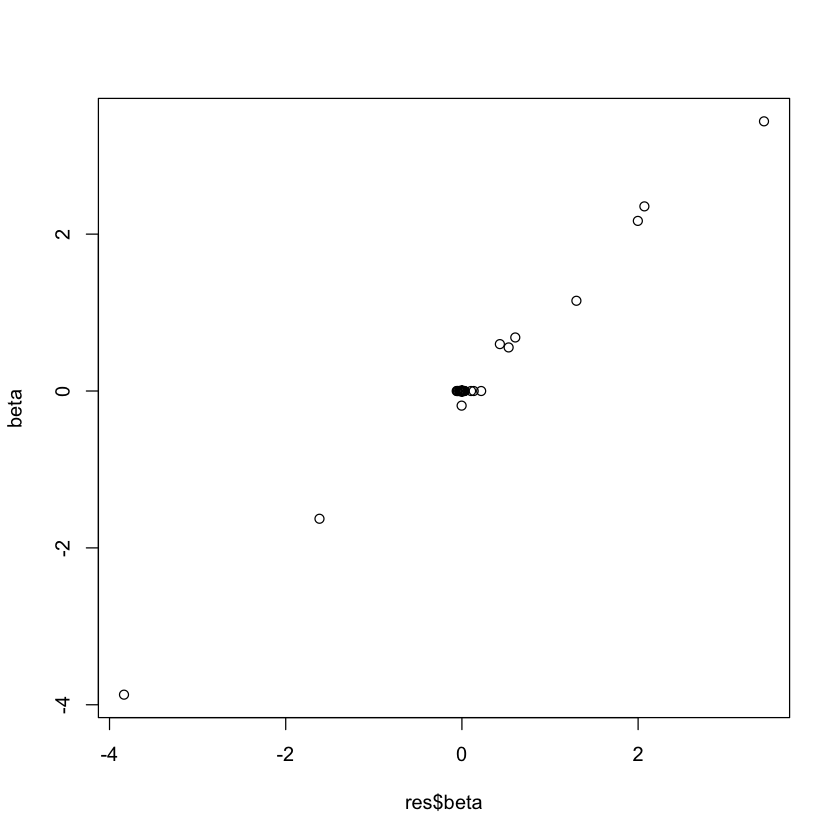

In [13]:
set.seed(2)
n <- 100
m <- 95
ntrue <- 10
e <- rnorm(n)
X <- matrix(rnorm(n*m),n,m)
tbeta <- sample(1:m,ntrue) # true betas
beta <- rep(0,m)
beta[tbeta]<- rnorm(ntrue,0,2)
y <- X%*%beta+e
res<- vbsr(y,X,family='normal')
plot(res$beta,beta)

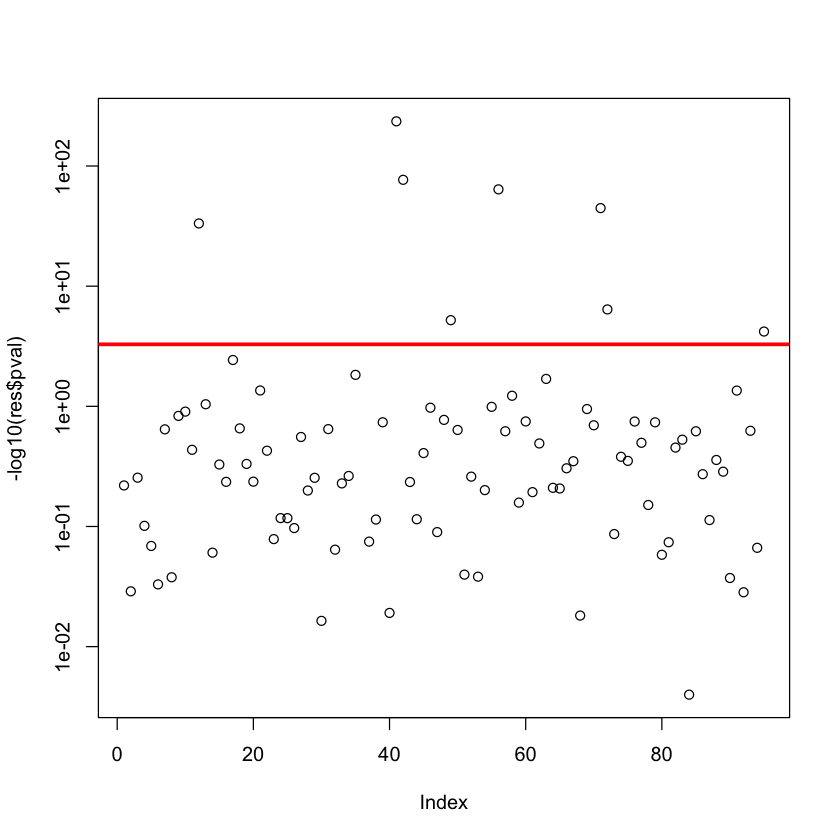

In [16]:
plot(-log10(res$pval),log='y')
lines(c(-10,m+10),c(-log10(0.05/m),-log10(0.05/m)),col='red',lwd=3)

In [17]:
cat('True variables:',sort(tbeta),'\n');

True variables: 12 34 36 41 42 49 56 71 72 95 


In [18]:
cat('Vbsr variables:',which(res$pval<0.05/m),'\n');

Vbsr variables: 12 36 41 42 49 56 71 72 95 


In [19]:
ols <- lm(y~X);
beta_ols <- summary(ols)$coef[-1,1];
beta_vbsr <- res$beta;
cat('OLS MSE:',mean((beta-beta_ols)^2),'\n');

OLS MSE: 1.13003 


In [20]:
cat('VBSR MSE:',mean((beta-beta_vbsr)^2),'\n');

VBSR MSE: 0.003087738 


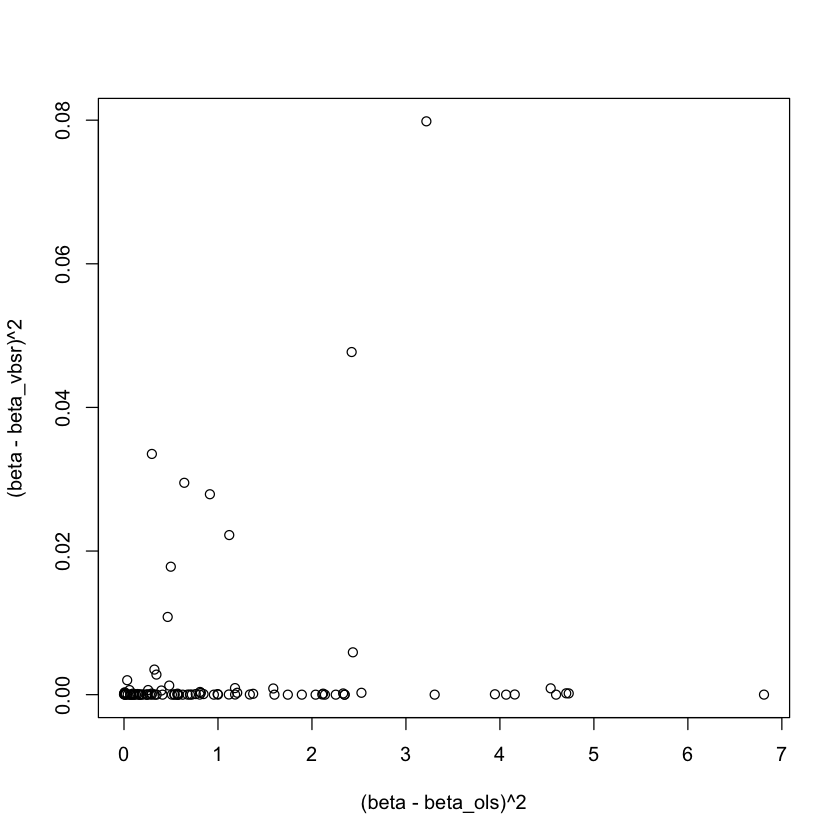

In [21]:
plot((beta-beta_ols)^2,(beta-beta_vbsr)^2)

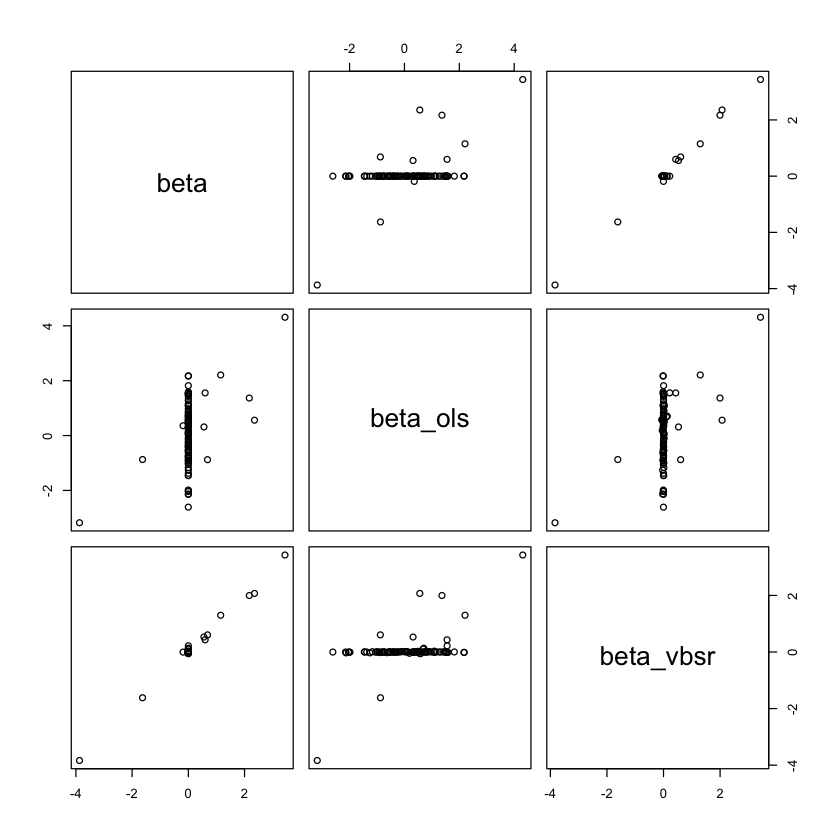

In [22]:
pairs(cbind(beta,beta_ols,beta_vbsr))

In [23]:
lmfun <- function(x,y){return(summary(lm(y~x))$coef[2,1]);}
beta_uni <- apply(X,2,lmfun,y);
cat('UNI MSE:',mean((beta-beta_uni)^2),'\n');

UNI MSE: 0.4133284 


In [24]:
cat('VBSR MSE:',mean((beta-beta_vbsr)^2),'\n');

VBSR MSE: 0.003087738 


## Moderately correlated features

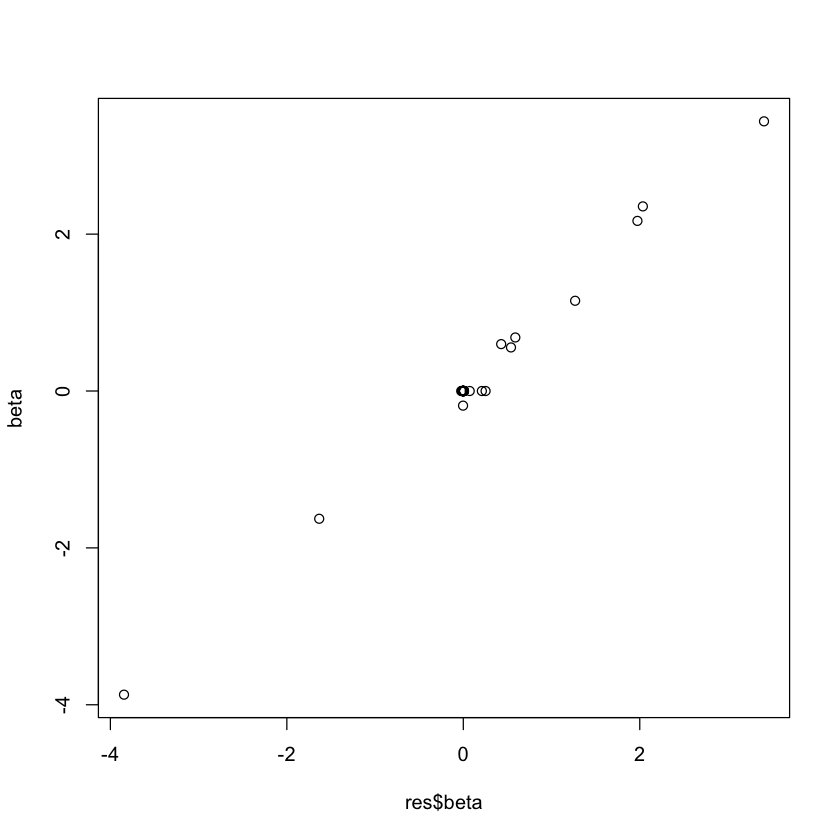

In [25]:
g <- rnorm(n);
X <- X+g;
y <- X%*%beta+e
res<- vbsr(y,X,family='normal')
plot(res$beta,beta)

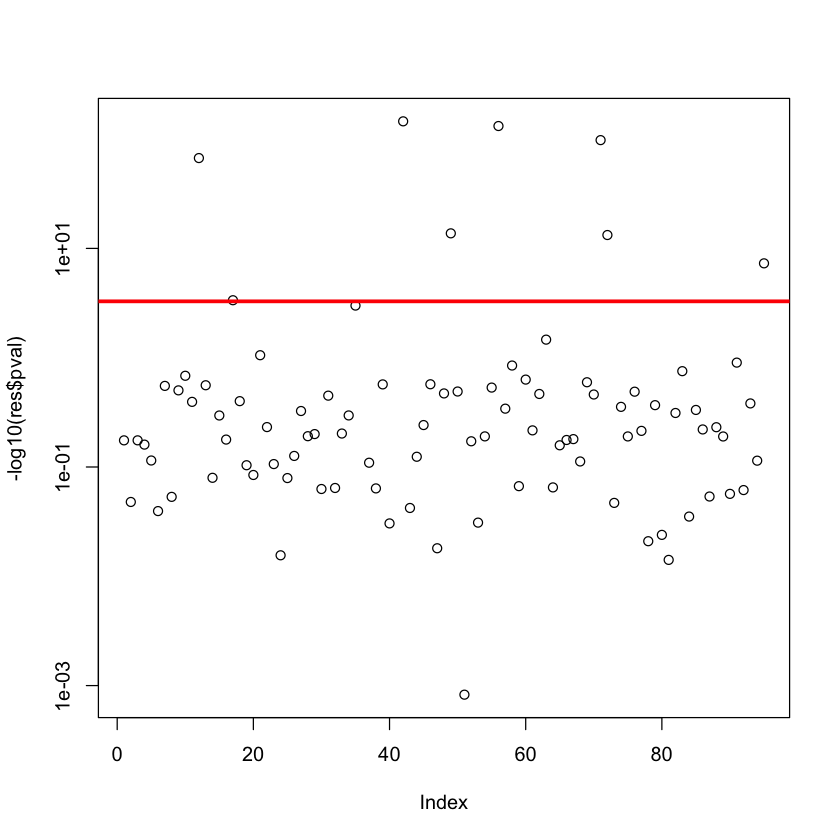

In [26]:
plot(-log10(res$pval),log='y')
lines(c(-10,m+10),c(-log10(0.05/m),-log10(0.05/m)),col='red',lwd=3)

In [27]:
cat('True variables:',sort(tbeta),'\n');

True variables: 12 34 36 41 42 49 56 71 72 95 


In [28]:
cat('Vbsr variables:',which(res$pval<0.05/m),'\n');

Vbsr variables: 12 17 36 41 42 49 56 71 72 95 


In [29]:
ols <- lm(y~X);
beta_ols <- summary(ols)$coef[-1,1];
beta_vbsr <- res$beta;
cat('OLS MSE:',mean((beta-beta_ols)^2),'\n');

OLS MSE: 0.579314 


In [30]:
cat('VBSR MSE:',mean((beta-beta_vbsr)^2),'\n');

VBSR MSE: 0.003592266 


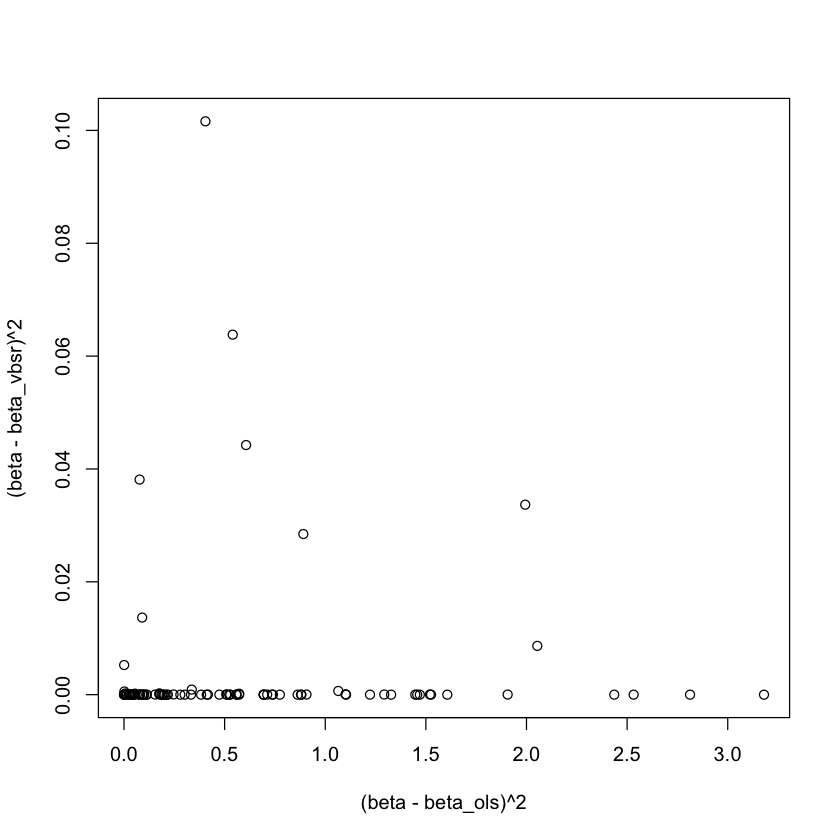

In [31]:
plot((beta-beta_ols)^2,(beta-beta_vbsr)^2)

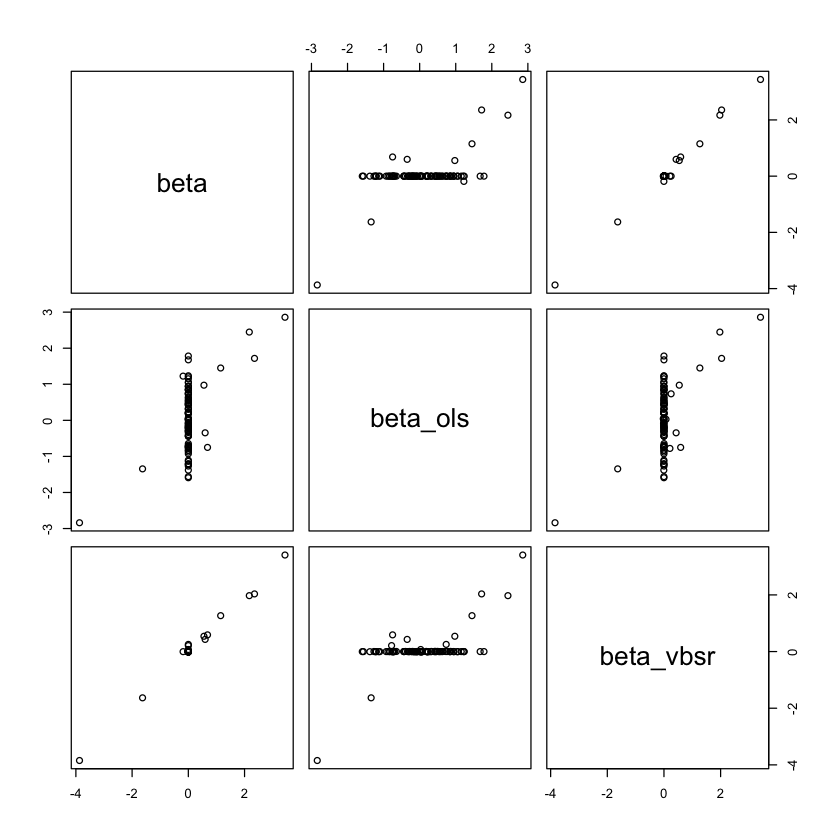

In [32]:
pairs(cbind(beta,beta_ols,beta_vbsr))

In [33]:
lmfun <- function(x,y){return(summary(lm(y~x))$coef[2,1]);}
beta_uni <- apply(X,2,lmfun,y);
cat('UNI MSE:',mean((beta-beta_uni)^2),'\n');

UNI MSE: 6.379615 


In [34]:
cat('VBSR MSE:',mean((beta-beta_vbsr)^2),'\n');

VBSR MSE: 0.003592266 
